In [2]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
# To reload local imported modules dynamically
%autoreload 2
plt.rcParams["figure.figsize"] = (20,10)

## Пример градиентного спуска с лекции

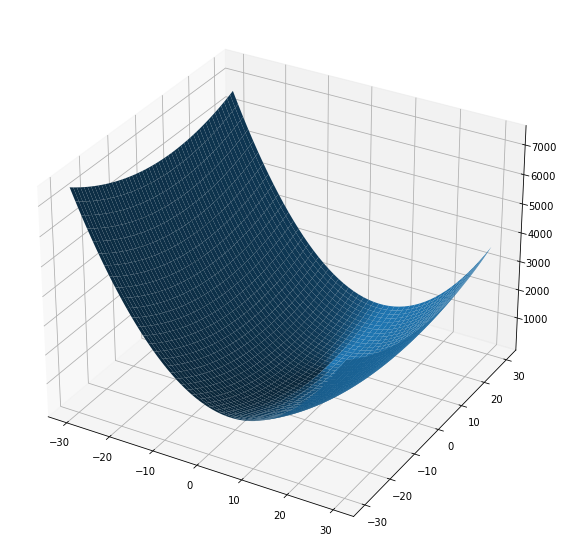

In [3]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [ -5.         -16.76      ]
 [  1.         -13.9088    ]
 [  3.4        -11.399744  ]
 [  4.36        -9.19177472]
 [  4.744       -7.24876175]
 [  4.8976      -5.53891034]
 [  4.95904     -4.0342411 ]
 [  4.983616    -2.71013217]
 [  4.9934464   -1.54491631]
 [  4.99737856  -0.51952635]
 [  4.99895142   0.38281681]
 [  4.99958057   1.17687879]
 [  4.99983223   1.87565334]
 [  4.99993289   2.49057494]
 [  4.99997316   3.03170594]
 [  4.99998926   3.50790123]
 [  4.99999571   3.92695308]
 [  4.99999828   4.29571871]
 [  4.99999931   4.62023247]]


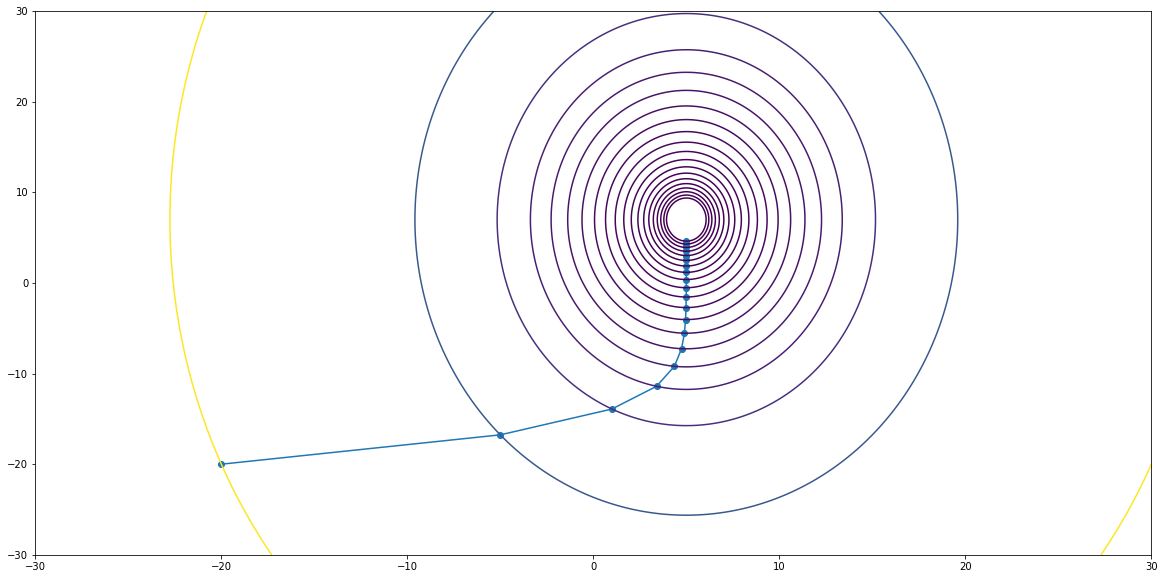

In [4]:
lr = 0.06
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Экспоненциальный шаг градиентного спуска

[[-20.         -20.        ]
 [  4.75124584 -14.6537309 ]
 [  4.99507434 -10.40873924]
 [  4.99985442  -7.02989259]
 [  4.99999429  -4.33393806]
 [  4.99999972  -2.17770299]
 [  4.99999998  -0.44905595]
 [  5.           0.94003479]
 [  5.           2.05884538]
 [  5.           2.96202044]
 [  5.           3.69276344]
 [  5.           4.28531052]
 [  5.           4.76685324]
 [  5.           5.15903643]
 [  5.           5.4791278 ]
 [  5.           5.74093317]
 [  5.           5.95551436]
 [  5.           6.13175352]
 [  5.           6.2767976 ]
 [  5.           6.39640937]]


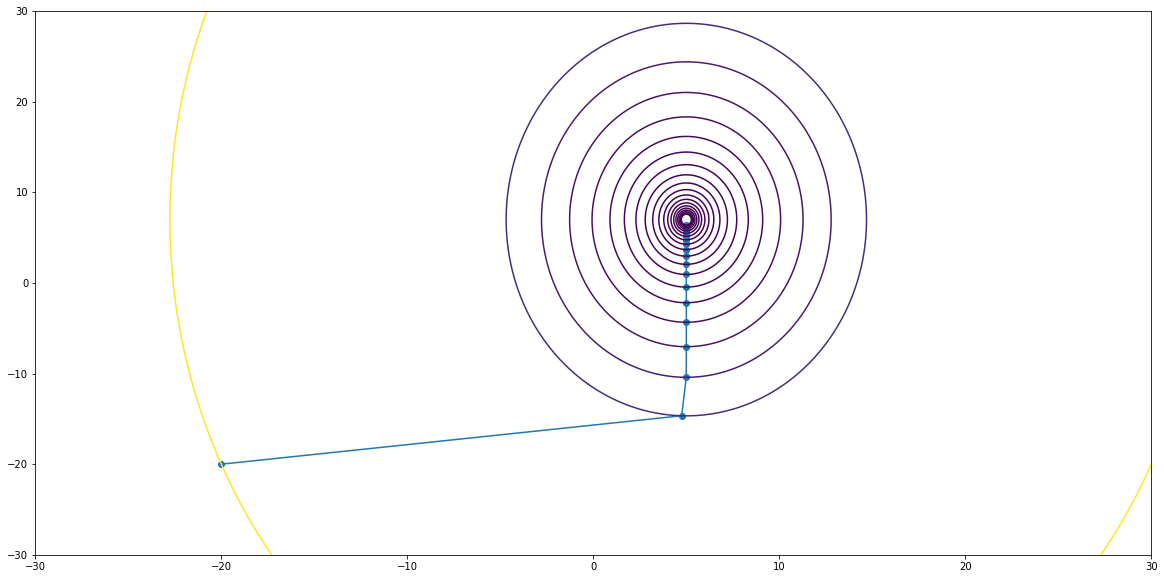

In [5]:
import optimization as opt

exp_decay = opt.exp_decay(0.1, 0.01)
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - exp_decay(i) * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Поиск минимума одномерной функции при помощи дихотомии

[2.2375     4.26875    5.284375   4.7765625  5.03046875 4.90351563
 4.96699219 4.99873047 5.01459961 5.00666504 5.00269775 5.00071411
 4.99972229 5.0002182  4.99997025 5.00009422 5.00003223 5.00000124
 4.99998574 4.99999349 4.99999737]


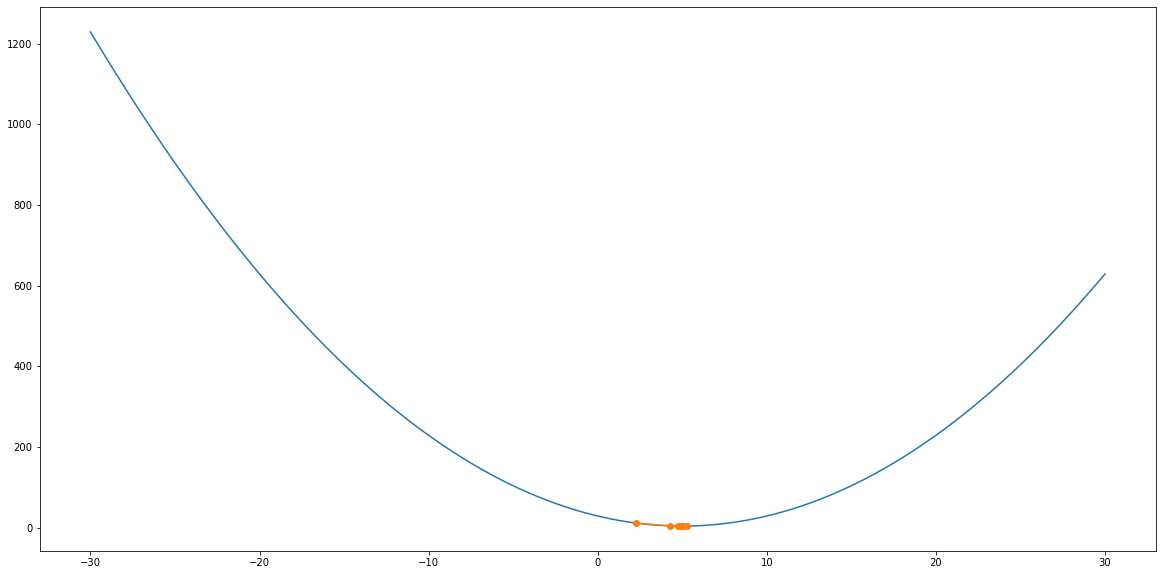

In [6]:
epoch = 20
x = -10
def f(x):
    return np.square(x - 5) + 4
bounds = opt.find_unimodal_interval(f, x)
points = opt.dichotomy(f, bounds, max_iter=epoch, log=True)
print(points)

t = np.linspace(-30, 30, 1000)
plt.plot(t, f(t))
plt.plot(points, f(points), 'o-')

## Градиентный спуск на основе дихотомии

[[0.5        0.5       ]
 [0.80199731 0.33880496]
 [0.81002514 0.53136804]
 [0.91180503 0.53010877]
 [0.93294947 0.73763885]
 [1.05771485 0.72891549]
 [1.07272097 0.91797621]
 [1.2179219  0.91107447]
 [1.22921259 1.08763812]
 [1.39216348 1.08371531]
 [1.40544513 1.25972018]
 [1.55986377 1.24192202]
 [1.58780193 1.39596797]
 [1.69517544 1.37340651]
 [1.77417021 1.52898767]
 [1.8495182  1.48564356]
 [1.92321486 1.59202662]
 [1.92644141 1.5899366 ]
 [1.97917479 1.55850937]
 [2.00452616 1.61272316]]


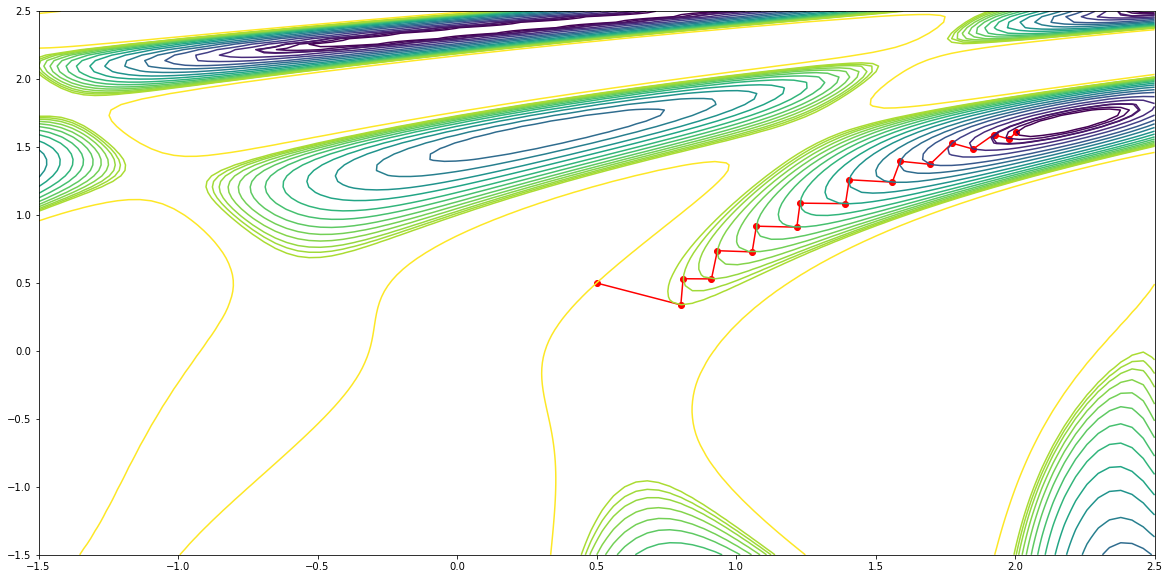

In [10]:
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))

epoch = 20
x = [0.5, 0.5]

points = np.zeros((epoch, 2))
points[0] = x

for i in range(1, epoch):
    x = opt.min_in_direction(f, x, -opt.grad(f, x), "dichotomy")
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")
t = np.linspace(-1.5, 2.5, 100)
X, Y = np.meshgrid(t, t)
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))